<a href="https://colab.research.google.com/github/EmmanuelADAM/IntelligenceArtificiellePython/blob/master/choixActiviteLogiqueFloue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activités dans le flou avec skfuzzy

L'objectif est de pouvoir représenter des règles de type :
- si le temps est 'ensoleillé' et la température est 'temperée' et le vent est 'faible', alors l'activite est 'intense'
- si le temps est 'ensoleillé' et la température est 'chaude', alors l'activite est 'modérée'
- si le temps est 'nuageux' et la température est 'temperée' et le vent est 'moderé', alors l'activite est 'moderée'
- si le temps est 'pluvieux' et la température est 'froide' et le vent est 'fort', alors l'activite est 'faible'


Reprenez les exemples d'utilisation de la logique floue et adaptez les à ce problème

On utilise pour cela la librairie python skfuzzy
*(si elle n'est pas présente, installez là avec cette ligne : !pip install -U scikit-fuzzy)*

In [ ]:
 !pip install -U scikit-fuzzy

In [ ]:
#les imports
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

## les antécédents et les conséquents
- Les antécédents sont les variables utilisées pour prendre les décisions (ici le temps, la température et le vent)
    - le temps est codé sur 0,100 où les ensembles ensoleillé, nuageux, pluvieux sont définis  
    - la température est codée sur -10,45 pour les ensembles froide, tempérée, chaude  
    - le vent est codé sur 0,100 où les ensembles faible, modéré, fort sont définis  
- le conséquent est l'activité, codée sur 0,100 où les ensembles faible, modéré, intense sont définis  

In [ ]:
# TODO: compléter le tout......
temps = ctrl.Antecedent(np.arange(0, 100.1, 0.1), 'temps')
température = ctrl.Antecedent(np.arange(-10, 45.1, 0.1), "température")
vent = ctrl.Antecedent(np.arange(0, 100.1, 0.1), "vent")
activité = ctrl.Consequent(np.arange(0, 100.1, 0.1), "activité")

#temps

In [ ]:
temps_ensoleillé = fuzz.trapmf(temps.universe, [0, 0, 30, 70])
temps_nuageux = fuzz.trapmf(temps.universe, [30, 50, 50, 70])
temps_pluvieux = fuzz.trapmf(temps.universe, [50, 70, 100, 100])
temps['ensoleillé'] = temps_ensoleillé
temps['nuageux'] = temps_nuageux
temps['pluvieux'] = temps_pluvieux

In [ ]:
temps_ensoleillé

array([1., 1., 1., ..., 0., 0., 0.])

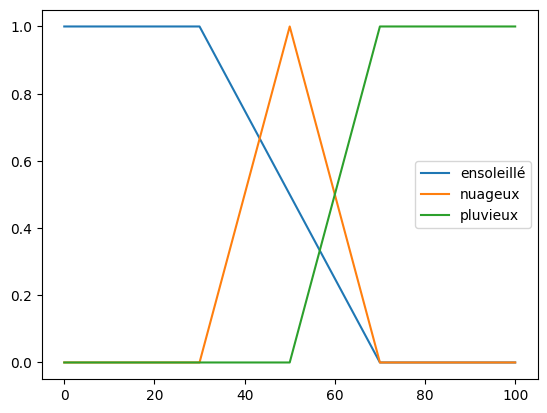

In [ ]:
plt.plot(temps.universe, temps_ensoleillé,  label='ensoleillé')
plt.plot(temps.universe, temps_nuageux,label='nuageux')
plt.plot(temps.universe, temps_pluvieux,  label='pluvieux')
plt.legend()
plt.show()

#température

In [ ]:
température_froide = fuzz.trapmf(température.universe, [-10, -10, 5, 15])
température_tempérée = fuzz.trapmf(température.universe, [10, 20, 25, 35])
température_chaude = fuzz.trapmf(température.universe, [30, 35, 45, 45])

température['froide'] = température_froide
température['tempérée'] =température_tempérée
température['chaude'] = température_chaude

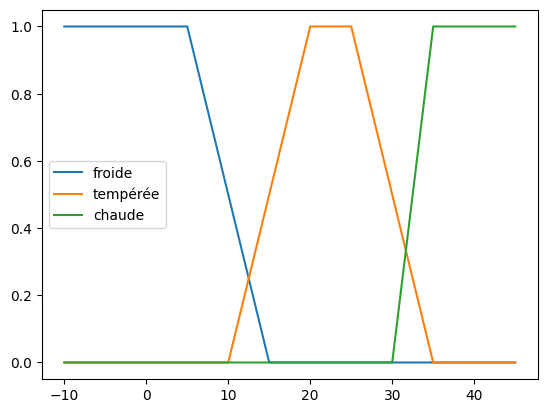

In [ ]:
plt.plot(température.universe, température_froide,  label='froide')
plt.plot(température.universe, température_tempérée,  label='tempérée')
plt.plot(température.universe, température_chaude,label='chaude')
plt.legend()
plt.show()

#vent

In [ ]:
vent_faible = fuzz.trapmf(vent.universe, [0, 0, 20, 40])
vent_modéré = fuzz.trapmf(vent.universe, [30, 50, 50, 70])
vent_fort = fuzz.trapmf(vent.universe, [60, 80, 100, 100])
vent['faible'] = vent_faible
vent['modéré'] = vent_modéré
vent['fort'] = vent_fort

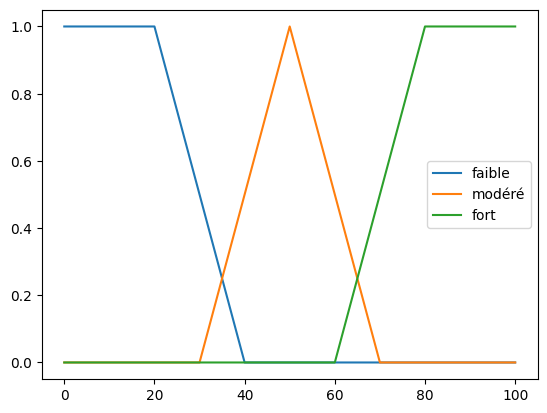

In [ ]:
plt.plot(vent.universe, vent_faible,  label='faible')
plt.plot(vent.universe, vent_modéré,label='modéré')
plt.plot(vent.universe, vent_fort,  label='fort')
plt.legend()
plt.show()

#activité

In [ ]:
activité_faible = fuzz.trapmf(activité.universe, [0, 0, 30, 50])
activité_modéré = fuzz.trapmf(activité.universe, [30, 50, 50, 70])
activité_intense = fuzz.trapmf(activité.universe, [50, 70, 100, 100])
activité['faible'] = activité_faible
activité['modéré'] = activité_modéré
activité['intense'] = activité_intense

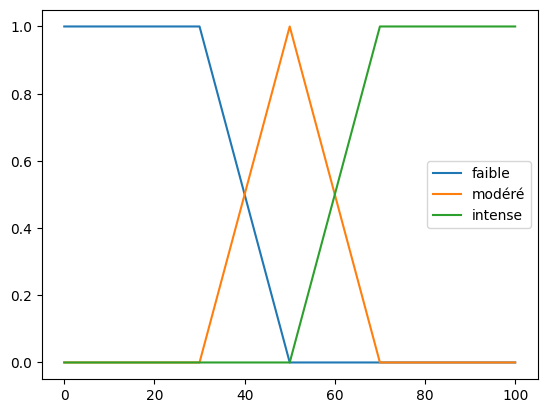

In [ ]:
plt.plot(activité.universe, activité_faible,  label='faible')
plt.plot(activité.universe, activité_modéré,label='modéré')
plt.plot(activité.universe, activité_intense,  label='intense')
plt.legend()
plt.show()

#regle de floue

- si le temps est 'ensoleillé' et la température est 'temperée' et le vent est 'faible', alors l'activite est 'intense'
- si le temps est 'ensoleillé' et la température est 'chaude', alors l'activite est 'modérée'
- si le temps est 'nuageux' et la température est 'temperée' et le vent est 'moderé', alors l'activite est 'moderée'
- si le temps est 'pluvieux' et la température est 'froide' et le vent est 'fort', alors l'activite est 'faible'

In [ ]:
#on écrit
rule1  =  ctrl.Rule( temps['ensoleillé']& température['tempérée'] & vent['faible'],activité['intense'])
rule2 =  ctrl.Rule( temps['ensoleillé'] & température['chaude'], activité['modéré'])
rule3 =  ctrl.Rule( temps['nuageux'] &  température['tempérée'] & vent['modéré'],activité['modéré'])
rule4 = ctrl.Rule( temps['pluvieux'] & température['froide'] & vent['fort'],activité['faible'])

#rule3  =  ctrl.Rule( ...,...., duree['courte'])

#on compile les règles
temp_regles = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

temp_decision = ctrl.ControlSystemSimulation(temp_regles)

In [ ]:
temp_decision.input

temps : 17
température : 17
vent : 70

#Observations

In [ ]:
temp_decision.input['temps'] = 10
temp_decision.input['température'] = 10
temp_decision.input['vent'] = 10

temp_decision.compute()

print(temp_decision.output['activité'])

74.99999999999996


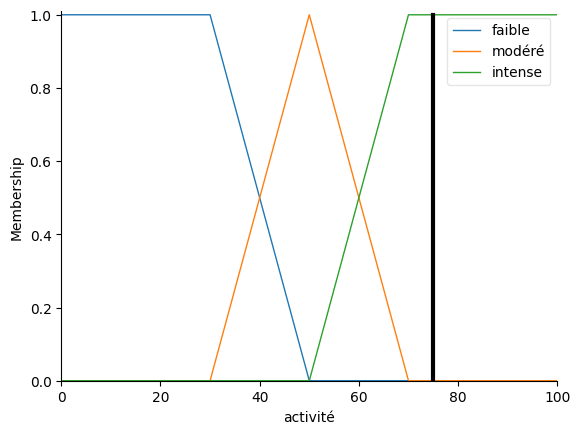

In [ ]:
activité.view(sim=temp_decision)